In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
image = './Einstein_1939.jpg'

In [9]:
prototxt = "./colorization_deploy_v2.prototxt.txt"
caffe_model = "./colorization_release_v2.caffemodel"
pts_npy = "./pts_in_hull.npy"

In [10]:
test_image =  "./"+image

In [11]:
net = cv2.dnn.readNetFromCaffe(prototxt,caffe_model)

In [12]:
pts = np.load(pts_npy)

In [13]:
layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

55
53


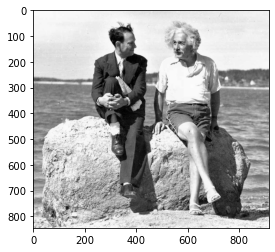

In [14]:

test_image = cv2.imread(test_image)

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)

plt.imshow(test_image)
plt.show()

In [15]:

normalized= test_image.astype("float32") / 255.0

lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)

resized = cv2.resize(lab_image, (224, 224))

L = cv2.split(resized)[0]
L -= 50   

In [16]:

net.setInput(cv2.dnn.blobFromImage(L))

ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


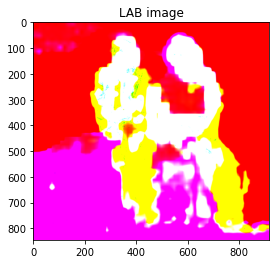

In [17]:
L = cv2.split(lab_image)[0]

LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

plt.imshow(LAB_colored)
plt.title('LAB image')
plt.show()

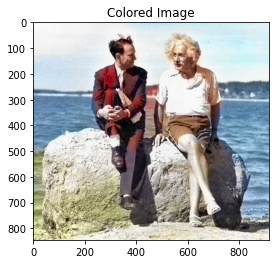

In [18]:

RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)

RGB_colored = np.clip(RGB_colored, 0, 1)

RGB_colored = (255 * RGB_colored).astype("uint8")

plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()

In [26]:

RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)

cv2.imwrite("./results/"+image, RGB_BGR)

True